In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import approx_fprime  # SciPy tool for gradients


In [9]:
x = np.array([1, 3])
y = np.array([3, 6])
n = len(x)


In [10]:
# Define Mean Squared Error
def mse(params):
    m, b = params
    y_pred = m * x + b
    return np.mean((y - y_pred) ** 2)

# Function to compute gradients using SciPy
def compute_gradients(params):
    epsilon = np.sqrt(np.finfo(float).eps)
    grad = approx_fprime(params, mse, epsilon)
    return grad


In [11]:
# Initialize values
params = np.array([-1.0, 1.0])  # [m, b]
alpha = 0.1
m_values = [params[0]]
b_values = [params[1]]
mse_values = []

# Perform 4 iterations
for i in range(4):
    current_mse = mse(params)
    grad = compute_gradients(params)
    params = params - alpha * grad  # update using gradient descent

    # Store values
    m_values.append(params[0])
    b_values.append(params[1])
    mse_values.append(current_mse)

    print(f"Iteration {i+1}:")
    print(f"  m = {params[0]:.4f}, b = {params[1]:.4f}")
    print(f"  MSE = {current_mse:.4f}")
    print(f"  Gradients = {grad}")
    print("-" * 40)


Iteration 1:
  m = 1.7000, b = 2.1000
  MSE = 36.5000
  Gradients = [-27. -11.]
----------------------------------------
Iteration 2:
  m = 1.2600, b = 1.9000
  MSE = 1.0400
  Gradients = [4.40000008 2.00000001]
----------------------------------------
Iteration 3:
  m = 1.3400, b = 1.9160
  MSE = 0.0640
  Gradients = [-0.80000001 -0.16000002]
----------------------------------------
Iteration 4:
  m = 1.3336, b = 1.8968
  MSE = 0.0348
  Gradients = [0.06400001 0.19199999]
----------------------------------------


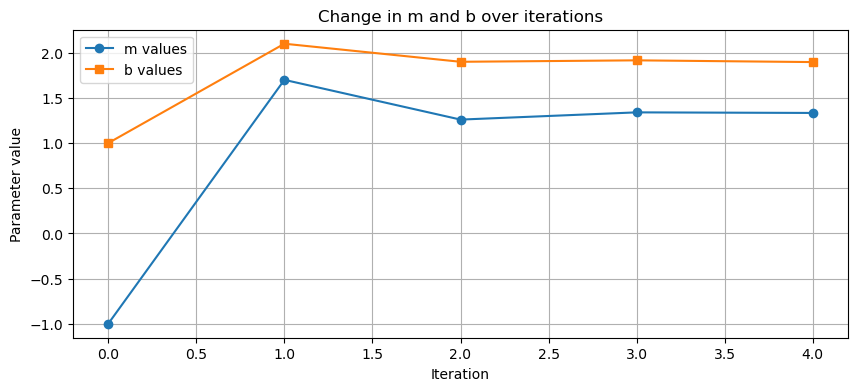

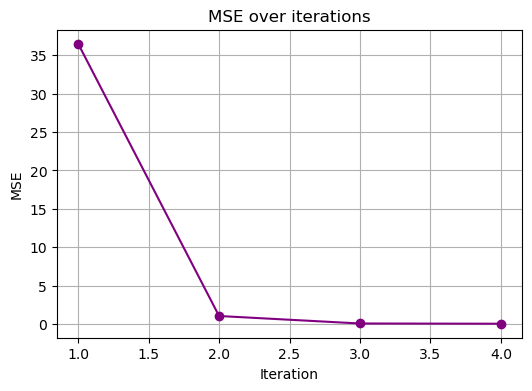

In [12]:
# Plot m and b change
plt.figure(figsize=(10, 4))
plt.plot(range(len(m_values)), m_values, marker='o', label='m values')
plt.plot(range(len(b_values)), b_values, marker='s', label='b values')
plt.title("Change in m and b over iterations")
plt.xlabel("Iteration")
plt.ylabel("Parameter value")
plt.legend()
plt.grid(True)
plt.show()

# Plot MSE change
plt.figure(figsize=(6, 4))
plt.plot(range(1, len(mse_values)+1), mse_values, marker='o', color='purple')
plt.title("MSE over iterations")
plt.xlabel("Iteration")
plt.ylabel("MSE")
plt.grid(True)
plt.show()
